In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import sys
import pandas as pd
#import Ofpp # Using PyPi to read parse the field and mesh files from OpenFoam
from windtools.io.vtk import readVTK
from matplotlib import colors as c
from sklearn.metrics import mean_squared_error
from math import sqrt
import subprocess
from matplotlib.colors import TwoSlopeNorm
from scipy import signal
#from lbow.steadystate import HalfPlaneModel

In [5]:
path = 'C:/Users/mehtabkhan/Desktop/Postprocessing/velocity_fileds_vtks/periodicWOA/final/U_yNormal.Sh0.01_fr0.01.vtk'
U0 = readVTK(path,res=20,squash='y')
path1 = 'C:/Users/mehtabkhan/Desktop/Postprocessing/velocity_fileds_vtks/periodicWOA/final/U_yNormal.Sh0.01_fr0.1.vtk'
U1 = readVTK(path1,res=20,squash='y')
path2 = 'C:/Users/mehtabkhan/Desktop/Postprocessing/velocity_fileds_vtks/periodicWOA/final/U_yNormal.Sh0.01_fr0.3.vtk'
U2 = readVTK(path2,res=20,squash='y')
path3 = 'C:/Users/mehtabkhan/Desktop/Postprocessing/velocity_fileds_vtks/periodicWOA/final/U_yNormal.Sh0.01_fr0.5.vtk'
U3 = readVTK(path3,res=20,squash='y')

Reading a single VTK. For output with `datetime` as coordinate, specify the path, sliceType, and t (see docstrings for example)
Reading a single VTK. For output with `datetime` as coordinate, specify the path, sliceType, and t (see docstrings for example)
Reading a single VTK. For output with `datetime` as coordinate, specify the path, sliceType, and t (see docstrings for example)
Reading a single VTK. For output with `datetime` as coordinate, specify the path, sliceType, and t (see docstrings for example)


In [6]:
path4 = 'C:/Users/mehtabkhan/Desktop/Postprocessing/velocity_fileds_vtks/periodicWOA/final/U_yNormal.Sh0.05_fr0.01.vtk'
U4 = readVTK(path4,res=20,squash='y')
path5 = 'C:/Users/mehtabkhan/Desktop/Postprocessing/velocity_fileds_vtks/periodicWOA/final/U_yNormal.Sh0.05_fr0.1.vtk'
U5 = readVTK(path5,res=20,squash='y')
path6 = 'C:/Users/mehtabkhan/Desktop/Postprocessing/velocity_fileds_vtks/periodicWOA/final/U_yNormal.Sh0.05_fr0.3.vtk'
U6 = readVTK(path6,res=20,squash='y')
path7 = 'C:/Users/mehtabkhan/Desktop/Postprocessing/velocity_fileds_vtks/periodicWOA/final/U_yNormal.Sh0.05_fr0.5.vtk'
U7 = readVTK(path7,res=20,squash='y')

Reading a single VTK. For output with `datetime` as coordinate, specify the path, sliceType, and t (see docstrings for example)
Reading a single VTK. For output with `datetime` as coordinate, specify the path, sliceType, and t (see docstrings for example)
Reading a single VTK. For output with `datetime` as coordinate, specify the path, sliceType, and t (see docstrings for example)
Reading a single VTK. For output with `datetime` as coordinate, specify the path, sliceType, and t (see docstrings for example)


In [7]:
path8 = 'C:/Users/mehtabkhan/Desktop/Postprocessing/velocity_fileds_vtks/periodicWOA/final/U_yNormal.Sh0.1_fr0.01.vtk'
U8 = readVTK(path8,res=20,squash='y')
path9 = 'C:/Users/mehtabkhan/Desktop/Postprocessing/velocity_fileds_vtks/periodicWOA/final/U_yNormal.Sh0.1_fr0.1.vtk'
U9 = readVTK(path9,res=20,squash='y')
path10 = 'C:/Users/mehtabkhan/Desktop/Postprocessing/velocity_fileds_vtks/periodicWOA/final/U_yNormal.Sh0.1_fr0.3.vtk'
U10 = readVTK(path10,res=20,squash='y')
path11 = 'C:/Users/mehtabkhan/Desktop/Postprocessing/velocity_fileds_vtks/periodicWOA/final/U_yNormal.Sh0.1_fr0.5.vtk'
U11 = readVTK(path11,res=20,squash='y')

Reading a single VTK. For output with `datetime` as coordinate, specify the path, sliceType, and t (see docstrings for example)
Reading a single VTK. For output with `datetime` as coordinate, specify the path, sliceType, and t (see docstrings for example)
Reading a single VTK. For output with `datetime` as coordinate, specify the path, sliceType, and t (see docstrings for example)
Reading a single VTK. For output with `datetime` as coordinate, specify the path, sliceType, and t (see docstrings for example)


In [8]:
print(U0.w.shape, U1.w.shape, U2.w.shape, U3.w.shape, U4.w.shape, U5.w.shape)
print(U6.w.shape, U7.w.shape, U8.w.shape, U9.w.shape, U10.w.shape, U11.w.shape)

(10001, 408) (8001, 1626) (2201, 1344) (2501, 1123) (10001, 455) (8001, 1664)
(2201, 1353) (2501, 1128) (10001, 514) (8001, 1711) (2201, 1365) (2501, 1134)


In [9]:
# non-damped region in each velocity field
v0 = U0.w[:, :158] #dc0.01 Ld0.5
v1 = U1.w[:, :646] #dc0.01 Ld0.75
v2 = U2.w[:, :536] #dc0.01 Ld1.0
v3 = U3.w[:, :448] #dc0.01 Ld1.25
v4 = U4.w[:, :158] #dc0.01 Ld1.5
v5 = U5.w[:, :646] #dc0.01 Ld2.0
v6 = U6.w[:, :536] #dc0.025 Ld0.5
v7 = U7.w[:, :448] #dc0.025 Ld0.75
v8 = U8.w[:, :158] #dc0.025 Ld1.0
v9 = U9.w[:, :646] #dc0.025 Ld1.25
v10 = U10.w[:, :536] #dc0.025 Ld1.5
v11 = U11.w[:, :448] #dc0.025 Ld2.0
# v12 = U12.w[40:1940, :80] #dc0.1 Ld0.5
# v13 = U13.w[60:1960, :80] #dc0.1 Ld0.75 
# v14 = U14.w[80:1980, :80] #dc0.1 Ld1.0
# v15 = U15.w[100:2000, :80] #dc0.1 Ld1.25
# v16 = U16.w[120:2020, :80] #dc0.1 Ld1.5
# v17 = U17.w[160:2060, :80] #dc0.1 Ld2.0
# v18 = U18.w[80:1980, :80] #dc0.001 Ld1.0
# v19 = U19.w[80:1980, :80] #dc0.5 Ld1.0
w_nondamp = [v0, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11] #, v12, v13, v14, v15, v16, v17, v18, v19]

In [10]:
#act0 = w1[49050:50950, :80]/abs(np.min(w1[49050:50950, :80]))
# act1 = w1[49040:50960, :80]/abs(np.min(w1[49040:50960, :80]))
# act2 = w1[49500:50500, :80]/abs(np.min(w1[49500:50500, :80]))
# act3 = w1[48845:51155, :80]/abs(np.min(w1[48845:51155, :80]))
# act4 = w1[48635:51365, :80]/abs(np.min(w1[48635:51365, :80]))
# act5 = w1[48344:51500, :80]/abs(np.min(w1[48344:51500, :80]))

# pred = []

# for i, arr in enumerate(w_nondamp):
#     pred.append(arr/abs(np.min(arr)))

In [11]:
# rms = []

# for i, arr in enumerate(w_nondamp):
#     rms.append(sqrt(mean_squared_error(act0,pred[i])))

In [12]:
w_detrend = []
for i, arr in enumerate(w_nondamp):
    a = arr * signal.windows.tukey(arr.shape[1],alpha=0.4)[np.newaxis,:]
    w_detrend.append(signal.detrend(a, axis=-1,type='constant'))

In [13]:
def upwardWave(elem):
    Nx,Nz = elem.shape
    ks = np.fft.fftshift(np.fft.fftfreq(Nx))
    ms = np.fft.fftshift(np.fft.fftfreq(Nz))
    Ks, Ms = np.meshgrid(ks,ms,indexing='ij')

    #Convert to Fourier space and extract
    #upward propagating part
    f_c = np.fft.fftshift(np.fft.fft2(elem))/elem.size
    fup_c = f_c.copy()

    fup_c[(Ks<=0) & (Ms>=0)] = 0.0 #Quadrant II
    fup_c[(Ks>=0) & (Ms<=0)] = 0.0 #Quadrant IV

    w_up = np.fft.ifft2(np.fft.ifftshift(fup_c*fup_c.size))

    return np.real(w_up)


def downwardWave(elem):
    Nx,Nz = elem.shape
    ks = np.fft.fftshift(np.fft.fftfreq(Nx))
    ms = np.fft.fftshift(np.fft.fftfreq(Nz))
    Ks, Ms = np.meshgrid(ks,ms,indexing='ij')

    #Convert to Fourier space and extract
    #downward propagating part
    f_c = np.fft.fftshift(np.fft.fft2(elem))/elem.size
    fdown_c = f_c.copy()

    fdown_c[(Ks>=0) & (Ms>=0)] = 0.0 #Quadrant I
    fdown_c[(Ks<=0) & (Ms<=0)] = 0.0 #Quadrant III

    w_down = np.fft.ifft2(np.fft.ifftshift(fdown_c*fdown_c.size))

    return np.real(w_down)

In [14]:
ke_u = []

for i, arr in enumerate(w_nondamp):
    ke_u.append(np.sum(0.5*(upwardWave(arr))**2))

In [15]:
ke_u_det = []

for i, arr in enumerate(w_detrend):
    ke_u_det.append(np.sum(0.5*(upwardWave(arr))**2))

In [16]:
ke_d = []

for i, arr in enumerate(w_nondamp):
    ke_d.append(np.sum(0.5*(downwardWave(arr))**2))

In [17]:
ke_d_det = []

for i, arr in enumerate(w_detrend):
    ke_d_det.append(np.sum(0.5*(downwardWave(arr))**2))

In [18]:
cr = np.array(ke_d) / np.array(ke_u) * 100
cr_det = np.array(ke_d_det) / np.array(ke_u_det) * 100

In [19]:
print('Sh0.01', cr_det[:4])
print('Sh0.05', cr_det[4:8])
print('Sh0.1', cr_det[8:12])

Sh0.01 [2.59012608 3.13851485 3.29743792 5.36910101]
Sh0.05 [58.88793132  4.47635287  3.28583769  5.22149617]
Sh0.1 [118.15941481  85.38968199   3.36865179   4.81482095]


In [20]:
print('Sh0.01', cr[:4])
print('Sh0.05', cr[4:8])
print('Sh0.1', cr[8:12])

Sh0.01 [1.49094394 0.08225767 2.20914209 5.58877483]
Sh0.05 [57.25884094  0.94631861  2.1449418   5.70262385]
Sh0.1 [117.94895726  83.70387814   1.98654473   5.43670707]


In [21]:
# print('dc = 0.01:', rms[:6])
# print('dc = 0.025:', rms[6:12])

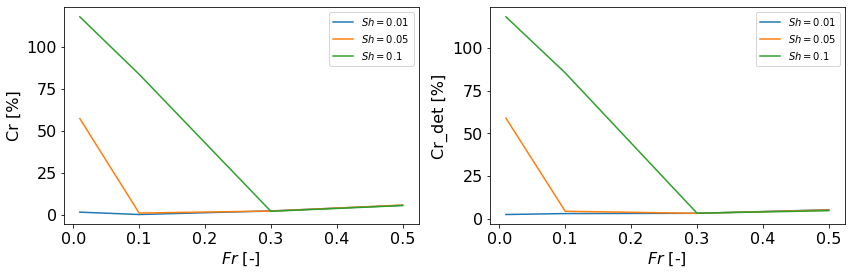

In [22]:
fr = [0.01, 0.1, 0.3, 0.5]
plt.figure(figsize=(14,4))
parameters = {'axes.labelsize': 16,'xtick.labelsize': 16, 'ytick.labelsize': 16}
plt.rcParams.update(parameters)
plt.subplot(1,2,1)
plt.plot(fr, cr[:4], label=r"$Sh = 0.01$")
plt.plot(fr, cr[4:8], label=r"$Sh = 0.05$")
plt.plot(fr, cr[8:12], label=r"$Sh = 0.1$")
plt.xlabel(r"$Fr$ [-]")
plt.ylabel('Cr [%]')
plt.legend()
plt.subplot(1,2,2)
plt.plot(fr, cr_det[:4], label=r"$Sh = 0.01$")
plt.plot(fr, cr_det[4:8], label=r"$Sh = 0.05$")
plt.plot(fr,cr_det[8:12], label=r"$Sh = 0.1$")
plt.xlabel(r"$Fr$ [-]")
plt.ylabel('Cr_det [%]')
plt.legend()

In [23]:
def autocorrelation(f):
    f_norm = f - np.mean(f)
    var = np.var(f)
    acorr = np.correlate(f_norm, f_norm, 'full')[len(f_norm)-1:]
    return acorr / var / len(f_norm)

In [24]:
def wavelength_visual(f):
    return 2*np.abs(xs[np.argmin(f)]-xs[np.argmax(f)])

In [25]:
def wavelength_corr(f):
    return 2*np.argmin(autocorrelation(f))*dx

In [26]:
def wavelength_visual_ver(f):
    return 2*np.abs(zs[np.argmin(f)]-zs[np.argmax(f)])

In [27]:
def wavelength_corr_ver(f):
    return 2*np.argmin(autocorrelation(f))*dz

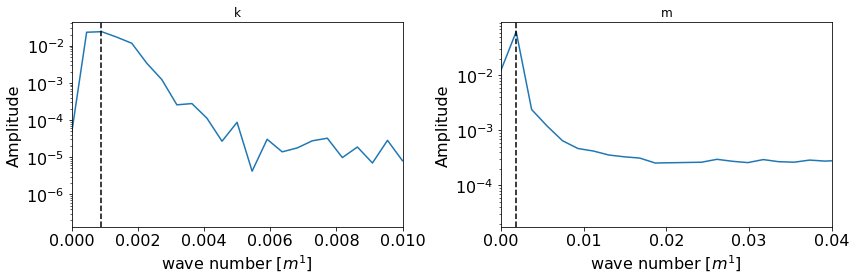

In [28]:
ks = np.fft.fftshift(np.fft.fftfreq(2201))
f_c = np.fft.fftshift(np.fft.fft(v2[:,150]))/2201
f_amp = abs(f_c)

#Vertical wave number
ms = np.fft.fftshift(np.fft.fftfreq(536))
f_cv = np.fft.fftshift(np.fft.fft(v2[1100,:]))/536
f_ampv = abs(f_cv)


plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(ks, f_amp)
plt.axvline(0.0009,linestyle='--',color='k')
plt.xlim([0,0.01])
#plt.ylim([0,0.05])
plt.xlabel("wave number [$m^{1}$]")
plt.ylabel("Amplitude")
plt.yscale('log')
plt.title('k')
plt.subplot(1,2,2)
plt.plot(ms, f_ampv)
plt.axvline(0.0018,linestyle='--',color='k')
plt.xlim([0,0.04])
#plt.ylim([0,0.005])
plt.xlabel("wave number [$m^{1}$]")
plt.ylabel("Amplitude")
plt.yscale('log')
plt.title('m')
plt.tight_layout()


In [29]:
## Horizontal wavenumbers at each quater of respective vertical wavelengths
ks = []  # This will be a list of lists for wavenumbers for each case
f_c = [] # list of amplitudes and phases for each case
f_amp = [] # List of amplitudes for each case
heights = []  # This will be a list of lists for heights for each case

Resolution = 20  # Given resolution
StartingHeight = [250, 200, 50, 25, 1250, 1000, 250, 125, 2500, 2000, 500, 250]  # Assuming height starts at the hill apex

for arr in w_nondamp:  # Assuming w_nondamp is your data
    case_wavenumbers = []
    case_f_c = []
    case_famp = []
    case_heights = []
    quarter_length = arr.shape[1] // 4
    for quarter in range(4):
        if quarter < 3:
            j = quarter * quarter_length + quarter_length // 2
        else:
            j = arr.shape[1] - quarter_length // 2  # middle column for the last quarter
        k = np.fft.fftshift(np.fft.fftfreq(int(arr.shape[0])))
        f = np.fft.fftshift(np.fft.fft(arr[:,j]))/int(arr.shape[0])
        amp = abs(f)
        height = StartingHeight[i] + (j * Resolution)
        case_wavenumbers.append(k)
        case_f_c.append(f)
        case_famp.append(amp)
        case_heights.append(height)
    ks.append(case_wavenumbers)
    f_c.append(case_f_c)
    f_amp.append(case_famp)
    heights.append(case_heights)
    
# Vertical wavenumbers at each quater of respective horizontal wavelengths
ms = []  # This will be a list of lists for wavenumbers for each case
f_cv = [] # list of amplitudes and phases for each case
f_ampv = [] # List of amplitudes for each case
x_locations = []  # This will be a list of lists for heights for each case


for arr in w_nondamp:  # Assuming w_nondamp is your data
    case_wavenumbers = []
    case_f_cv = []
    case_fampv = []
    case_x_locations = []
    quarter_length = arr.shape[0] // 8
    for quarter in range(8):
        if quarter < 7:
            j = quarter * quarter_length + quarter_length // 2
        else:
            j = arr.shape[0] - quarter_length // 2 - 1 # Middle column for the last quarter
        m = np.fft.fftshift(np.fft.fftfreq(int(arr.shape[1])))
        f = np.fft.fftshift(np.fft.fft(arr[j,:]))/int(arr.shape[1])
        amp = abs(f)
        location = Resolution * -(int(arr.shape[0])//2) + (j * Resolution)
        case_wavenumbers.append(m)
        case_f_cv.append(f)
        case_fampv.append(amp)
        case_x_locations.append(location)
    ms.append(case_wavenumbers)
    f_cv.append(case_f_cv)
    f_ampv.append(case_fampv)
    x_locations.append(case_x_locations)

In [30]:
len(ks[0][2])

10001

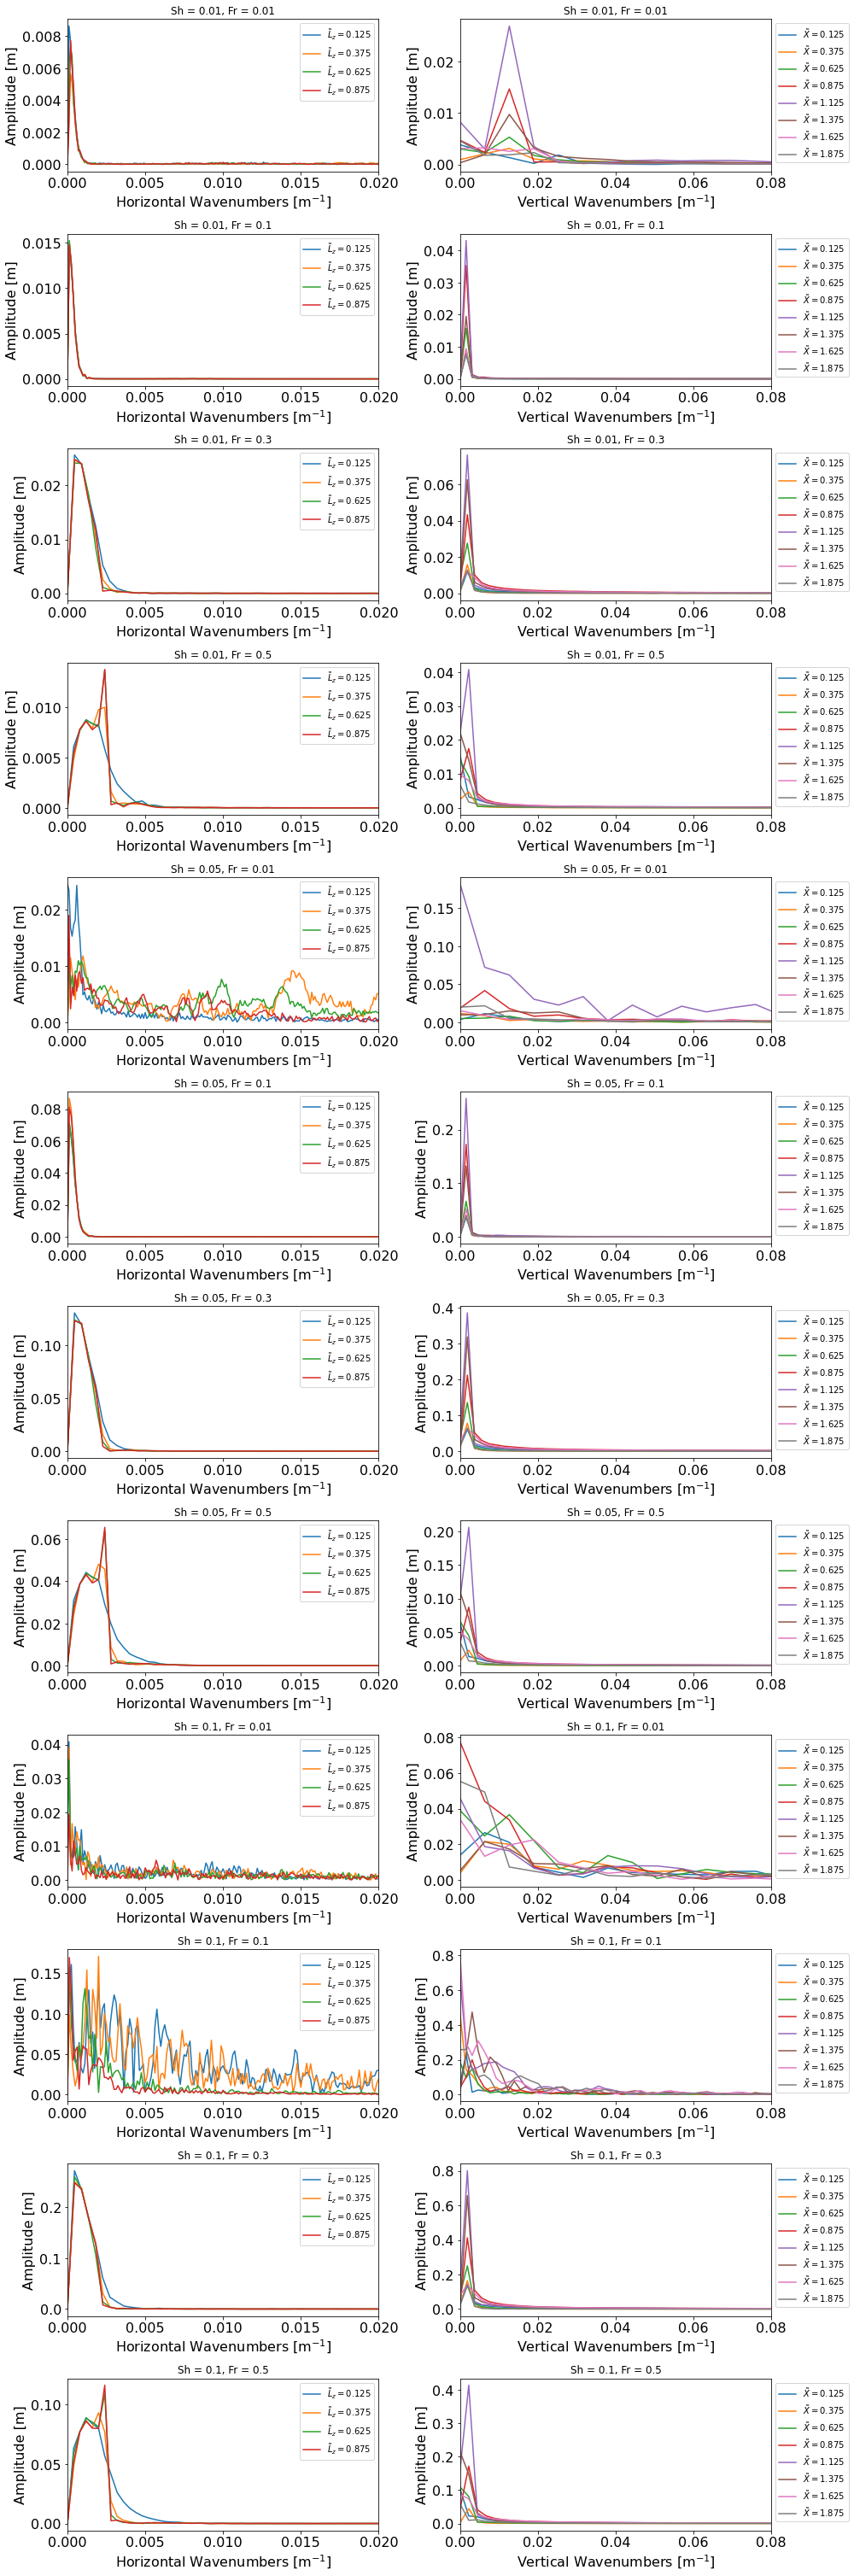

In [31]:
# Legend and title labels
Lz_labels = [r"$\tilde{L}_z = 0.125$", r"$\tilde{L}_z = 0.375$", r"$\tilde{L}_z = 0.625$", r"$\tilde{L}_z = 0.875$"]
X_labels = [r"$\tilde{X} = 0.125$", r"$\tilde{X} = 0.375$", r"$\tilde{X} = 0.625$", r"$\tilde{X} = 0.875$", r"$\tilde{X} = 1.125$", r"$\tilde{X} = 1.375$", r"$\tilde{X} = 1.625$", r"$\tilde{X} = 1.875$"]
sh_values = ["Sh = 0.01", "Sh = 0.05", "Sh = 0.1"]
fr_values = ["Fr = 0.01", "Fr = 0.1", "Fr = 0.3", "Fr = 0.5"]

# Combine Sh and Fr values for subplot titles
title_combinations = [f"{sh}, {fr}" for sh in sh_values for fr in fr_values]

fig, axes = plt.subplots(len(sh_values)*len(fr_values), 2, figsize=(14, 3.5*len(sh_values)*len(fr_values)))

for i in range(len(sh_values)*len(fr_values)):
    group_title = title_combinations[i]

    # Plotting amplitude vs ks with Lz_labels for legends (Left Subplots)
    for j in range(4):
        axes[i, 0].plot(ks[i][j], f_amp[i][j], label=Lz_labels[j])
    axes[i, 0].set_title(group_title)
    axes[i, 0].set_xlim(0, 0.02)
    axes[i, 0].set_xlabel('Horizontal Wavenumbers [m$^{-1}$]')
    axes[i, 0].set_ylabel('Amplitude [m]')
    axes[i, 0].legend()

    # Plotting amplitude vs ms with X_labels for legends (Right Subplots)
    for j in range(8):
        axes[i, 1].plot(ms[i][j], f_ampv[i][j], label=X_labels[j])
    axes[i, 1].set_title(group_title)
    axes[i, 1].set_xlim(0, 0.08)
    axes[i, 1].set_xlabel('Vertical Wavenumbers [m$^{-1}$]')
    axes[i, 1].set_ylabel('Amplitude [m]')
    # Place legend outside the plot area
    axes[i, 1].legend(loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()


In [32]:
k_eff = []
m_eff = []

for i in range(len(f_amp)):
    # Ensure f_amp[i] and f_ampv[i] are treated as NumPy arrays
    f_amp_array = np.array(f_amp[i])
    f_ampv_array = np.array(f_ampv[i])
    
    # Filter for positive ks values and their indices
    positive_ks_indices = np.where(ks[i][0] > 0)[0]
    positive_ks = ks[i][0][positive_ks_indices]
    filtered_amps_ks = f_amp_array[:, positive_ks_indices]
    
    # Find the index of max amplitude for each height after filtering
    max_amp_index_ks = np.argmax(filtered_amps_ks, axis=1)
    ks_values_for_case = [positive_ks[index] for index in max_amp_index_ks]
    k_eff.append(ks_values_for_case)
    
    # Filter for positive ms values and their indices
    positive_ms_indices = np.where(ms[i][0] > 0)[0]
    positive_ms = ms[i][0][positive_ms_indices]
    filtered_amps_ms = f_ampv_array[:, positive_ms_indices]
    
    # Find the index of max amplitude for each x location after filtering
    max_amp_index_ms = np.argmax(filtered_amps_ms, axis=1)
    ms_values_for_case = [positive_ms[index] for index in max_amp_index_ms]
    m_eff.append(ms_values_for_case)

# k_eff and m_eff now contain the positive ks and ms values for the highest amplitude in each case.


In [33]:

k_eff = []
m_eff = []

for i in range(len(f_amp)):  # Assuming f_amp and f_ampv are lists containing arrays for each case
    # Ensure f_amp[i] and f_ampv[i] are NumPy arrays
    f_amp_array = np.array(f_amp[i])
    f_ampv_array = np.array(f_ampv[i])
    
    # For horizontal wavenumbers (ks)
    positive_ks_indices = np.where(ks[i][0] > 0)[0]
    positive_ks = ks[i][0][positive_ks_indices]
    filtered_amps_ks = f_amp_array[:, positive_ks_indices]
    
    # Find the global max amplitude and its index across all heights for positive ks
    max_amp_index_global_ks = np.unravel_index(np.argmax(filtered_amps_ks, axis=None), filtered_amps_ks.shape)
    k_eff.append(positive_ks[max_amp_index_global_ks[1]])  # max_amp_index_global_ks[1] gives the index in the filtered positive ks
    
    # For vertical wavenumbers (ms)
    positive_ms_indices = np.where(ms[i][0] > 0)[0]
    positive_ms = ms[i][0][positive_ms_indices]
    filtered_amps_ms = f_ampv_array[:, positive_ms_indices]
    
    # Find the global max amplitude and its index across all x locations for positive ms
    max_amp_index_global_ms = np.unravel_index(np.argmax(filtered_amps_ms, axis=None), filtered_amps_ms.shape)
    m_eff.append(positive_ms[max_amp_index_global_ms[1]])  # max_amp_index_global_ms[1] gives the index in the filtered positive ms

# k_eff and m_eff now each contain a single positive ks and ms value corresponding to the highest amplitude across all heights and x locations within each case.


In [34]:
print(k_eff)
print(m_eff)

[9.999000099990002e-05, 0.00012498437695288088, 0.00045433893684688776, 0.0023990403838464614, 0.0005999400059994001, 0.00012498437695288088, 0.00045433893684688776, 0.0023990403838464614, 9.999000099990002e-05, 0.001999750031246094, 0.00045433893684688776, 0.0023990403838464614]
[0.012658227848101266, 0.0015479876160990713, 0.0018656716417910447, 0.002232142857142857, 0.006329113924050633, 0.0015479876160990713, 0.0018656716417910447, 0.002232142857142857, 0.006329113924050633, 0.0030959752321981426, 0.0018656716417910447, 0.002232142857142857]


[89.54741801416108, 85.38395724096951, 76.31341594199098, 42.936080925094004, 84.58508264984127, 85.38395724096951, 76.31341594199098, 42.936080925094004, 89.09489249891291, 57.14080402131263, 76.31341594199098, 42.936080925094004]


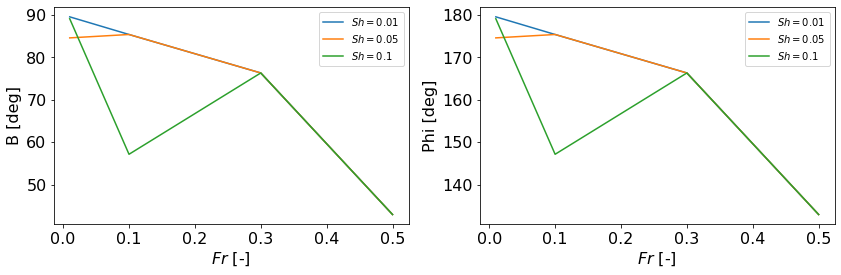

In [35]:
B = []
Phi = []
for i in range(len(k_eff)):
    B.append(np.degrees(np.arccos(k_eff[i]/(np.sqrt(k_eff[i]**2+m_eff[i]**2)))))
    Phi.append(90 + B[i])    
        

plt.figure(figsize=(14,4))
parameters = {'axes.labelsize': 16,'xtick.labelsize': 16, 'ytick.labelsize': 16}
plt.rcParams.update(parameters)
plt.subplot(1,2,1)
plt.plot(fr, B[:4], label=r"$Sh = 0.01$")
plt.plot(fr, B[4:8], label=r"$Sh = 0.05$")
plt.plot(fr, B[8:12], label=r"$Sh = 0.1$")
plt.xlabel(r"$Fr$ [-]")
plt.ylabel('B [deg]')
plt.legend()
plt.subplot(1,2,2)
plt.plot(fr, Phi[:4], label=r"$Sh = 0.01$")
plt.plot(fr, Phi[4:8], label=r"$Sh = 0.05$")
plt.plot(fr,Phi[8:12], label=r"$Sh = 0.1$")
plt.xlabel(r"$Fr$ [-]")
plt.ylabel('Phi [deg]')
plt.legend()

print(B)

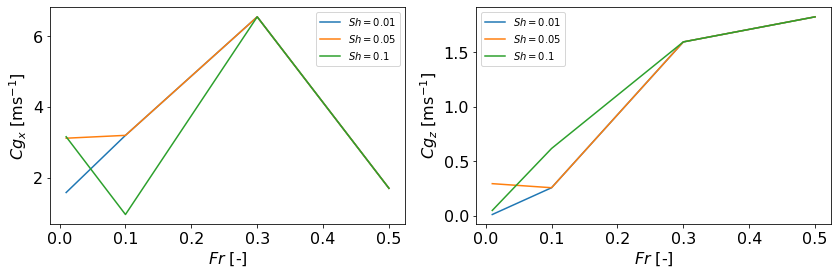

In [36]:
N = [0.020000, 0.005000, 0.013333, 0.012000, 0.020000, 0.005000, 0.013333, 0.012000, 0.020000, 0.005000, 0.013333, 0.012000]
Cg_x = []
Cg_z = []
for i in range(len(k_eff)):
    Cg_x.append((m_eff[i]**2 * N[i])/(k_eff[i]**2 + m_eff[i]**2)**(3/2))
    Cg_z.append((k_eff[i] * m_eff[i] * N[i])/(k_eff[i]**2 + m_eff[i]**2)**(3/2))
    
plt.figure(figsize=(14,4))
parameters = {'axes.labelsize': 16,'xtick.labelsize': 16, 'ytick.labelsize': 16}
plt.rcParams.update(parameters)
plt.subplot(1,2,1)
plt.plot(fr, Cg_x[:4], label=r"$Sh = 0.01$")
plt.plot(fr, Cg_x[4:8], label=r"$Sh = 0.05$")
plt.plot(fr, Cg_x[8:12], label=r"$Sh = 0.1$")
plt.xlabel(r"$Fr$ [-]")
plt.ylabel(r"$Cg_x$ [ms$^{-1}$]")
plt.legend()
plt.subplot(1,2,2)
plt.plot(fr, Cg_z[:4], label=r"$Sh = 0.01$")
plt.plot(fr, Cg_z[4:8], label=r"$Sh = 0.05$")
plt.plot(fr,Cg_z[8:12], label=r"$Sh = 0.1$")
plt.xlabel(r"$Fr$ [-]")
plt.ylabel(r"$Cg_z$ [ms$^{-1}$]")
plt.legend()

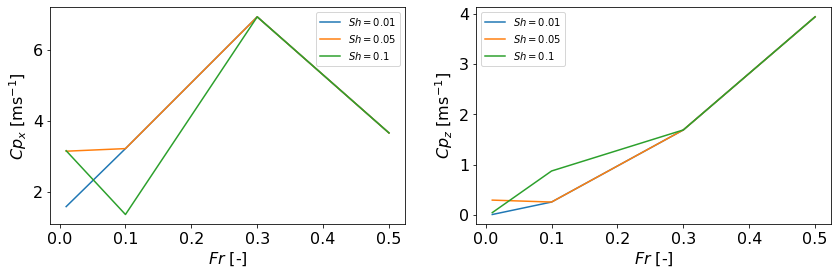

In [37]:
Cp_x = []
Cp_z = []
for i in range(len(k_eff)):
    Cp_x.append((N[i])/np.sqrt(k_eff[i]**2 + m_eff[i]**2))
    Cp_z.append((k_eff[i] * N[i])/(m_eff[i] * np.sqrt(k_eff[i]**2 + m_eff[i]**2)))
    
plt.figure(figsize=(14,4))
parameters = {'axes.labelsize': 16,'xtick.labelsize': 16, 'ytick.labelsize': 16}
plt.rcParams.update(parameters)
plt.subplot(1,2,1)
plt.plot(fr, Cp_x[:4], label=r"$Sh = 0.01$")
plt.plot(fr, Cp_x[4:8], label=r"$Sh = 0.05$")
plt.plot(fr, Cp_x[8:12], label=r"$Sh = 0.1$")
plt.xlabel(r"$Fr$ [-]")
plt.ylabel(r"$Cp_x$ [ms$^{-1}$]")
plt.legend()
plt.subplot(1,2,2)
plt.plot(fr, Cp_z[:4], label=r"$Sh = 0.01$")
plt.plot(fr, Cp_z[4:8], label=r"$Sh = 0.05$")
plt.plot(fr,Cp_z[8:12], label=r"$Sh = 0.1$")
plt.xlabel(r"$Fr$ [-]")
plt.ylabel(r"$Cp_z$ [ms$^{-1}$]")
plt.legend()

In [38]:

lamb_eff_hor_vis = []  # This will be a list of lists for wavelengths for each case
heights = []  # This will be a list of lists for heights for each case

StartingHeight = 0  # Assuming height starts at 0
Resolution = 20  # Given resolution

for arr in w_nondamp:  # Assuming w_nondamp is your data
    case_wavelengths = []
    case_heights = []
    quarter_length = arr.shape[1] // 4
    for quarter in range(4):
        if quarter < 3:
            j = quarter * quarter_length + quarter_length // 2
        else:
            j = arr.shape[1] - 1  # Last column for the last quarter
        wavelength = 40 * np.abs(np.argmax(arr.to_numpy()[:, j]) - np.argmin(arr.to_numpy()[:, j])) / 1000
        height = StartingHeight + (j * Resolution)
        case_wavelengths.append(wavelength)
        case_heights.append(height)
    lamb_eff_hor_vis.append(case_wavelengths)
    heights.append(case_heights)


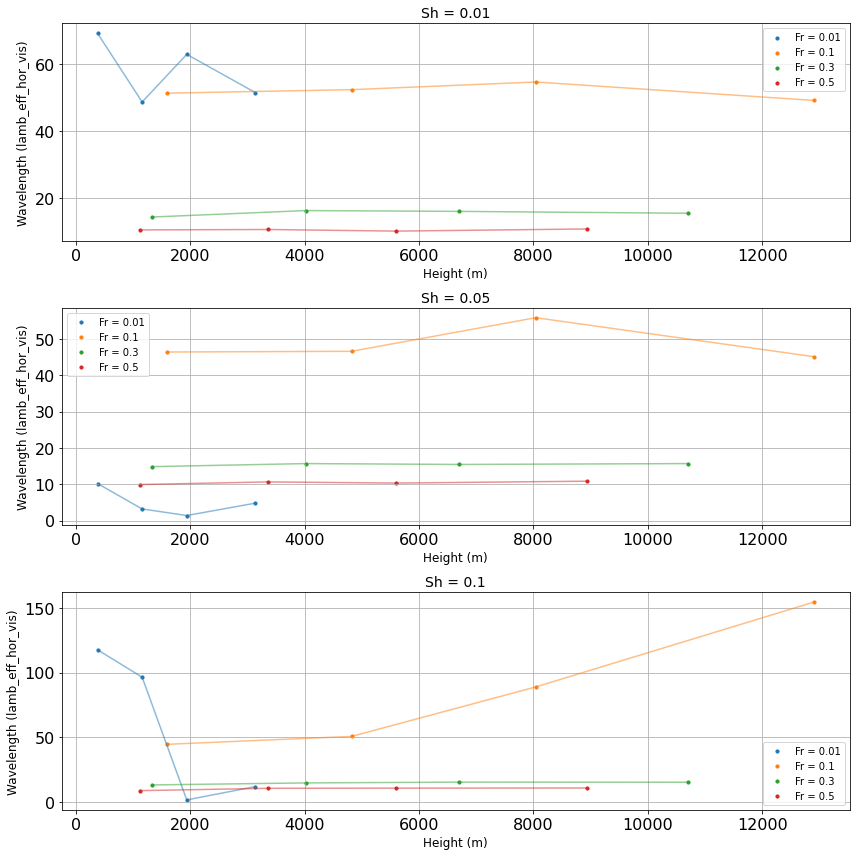

In [39]:
# Creating a figure with 3 subplots (vertical arrangement)
fig, axs = plt.subplots(3, 1, figsize=(12, 12))  # Adjust the figure size as needed

# Froude numbers for labeling
fr_labels = ["Fr = 0.01", "Fr = 0.1", "Fr = 0.3", "Fr = 0.5"]

# Sh values for subplot titles
sh_values = ["Sh = 0.01", "Sh = 0.05", "Sh = 0.1"]

# Plot groups of cases on different subplots
for group in range(3):
    for i in range(group * 4, (group + 1) * 4):
        label = fr_labels[i % 4]  # Select appropriate label based on position within the group
        axs[group].scatter(heights[i], lamb_eff_hor_vis[i], label=label, s=10)
        axs[group].plot(heights[i], lamb_eff_hor_vis[i], linestyle='-', marker='', alpha=0.5)  # Adjust alpha for line transparency

    axs[group].set_xlabel('Height (m)', fontsize=12)
    axs[group].set_ylabel('Wavelength (lamb_eff_hor_vis)', fontsize=12)
    axs[group].set_title(sh_values[group], fontsize=14)  # Set title based on Sh value
    axs[group].legend()
    axs[group].grid(True)

plt.tight_layout()  # Adjust layout
plt.show()


In [40]:
lamb_eff_ver_vis = []
x_locations = []  # This will be a list of lists for heights for each case

#StartingLocation = 0  # Assuming domain starts at 0
Resolution = 20  # Given resolution

for arr in w_nondamp:  # Assuming w_nondamp is your data
    case_wavelengths = []
    case_x_locations = []
    quarter_length = arr.shape[0] // 8
    for quarter in range(8):
        if quarter < 7:
            j = quarter * quarter_length + quarter_length // 2 # Middle column for each quarter
        else:
            j = arr.shape[0] - quarter_length // 2 -1 # Middle column for the last quarter
        wavelength = 40*np.abs(np.argmax(arr.to_numpy()[j, :])-np.argmin(arr.to_numpy()[j, :]))/1000
        x_location = Resolution * -(int(arr.shape[0])//2) + (j * Resolution)
        case_wavelengths.append(wavelength)
        case_x_locations.append(x_location)
    lamb_eff_ver_vis.append(case_wavelengths)
    x_locations.append(case_x_locations)


In [41]:
x_locations

[[-87500, -62500, -37500, -12500, 12500, 37500, 62500, 87500],
 [-70000, -50000, -30000, -10000, 10000, 30000, 50000, 70000],
 [-19260, -13760, -8260, -2760, 2740, 8240, 13740, 19260],
 [-21880, -15640, -9400, -3160, 3080, 9320, 15560, 21880],
 [-87500, -62500, -37500, -12500, 12500, 37500, 62500, 87500],
 [-70000, -50000, -30000, -10000, 10000, 30000, 50000, 70000],
 [-19260, -13760, -8260, -2760, 2740, 8240, 13740, 19260],
 [-21880, -15640, -9400, -3160, 3080, 9320, 15560, 21880],
 [-87500, -62500, -37500, -12500, 12500, 37500, 62500, 87500],
 [-70000, -50000, -30000, -10000, 10000, 30000, 50000, 70000],
 [-19260, -13760, -8260, -2760, 2740, 8240, 13740, 19260],
 [-21880, -15640, -9400, -3160, 3080, 9320, 15560, 21880]]

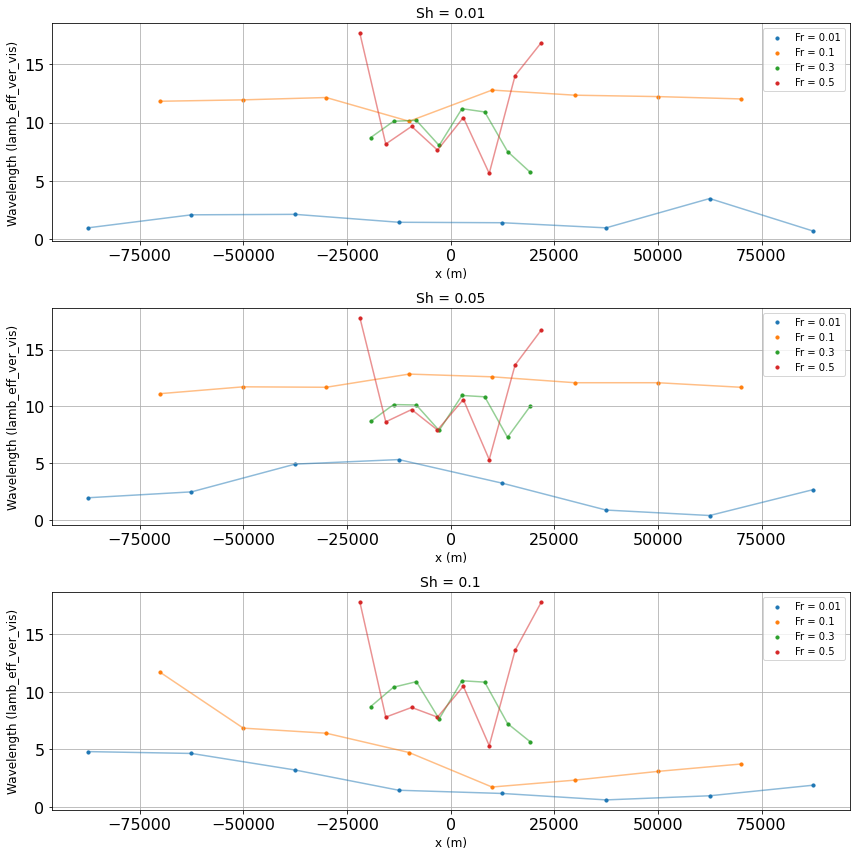

In [42]:
# Creating a figure with 3 subplots (vertical arrangement)
fig, axs = plt.subplots(3, 1, figsize=(12, 12))  # Adjust the figure size as needed

# Froude numbers for labeling
fr_labels = ["Fr = 0.01", "Fr = 0.1", "Fr = 0.3", "Fr = 0.5"]

# Sh values for subplot titles
sh_values = ["Sh = 0.01", "Sh = 0.05", "Sh = 0.1"]

# Plot groups of cases on different subplots
for group in range(3):
    for i in range(group * 4, (group + 1) * 4):
        label = fr_labels[i % 4]  # Select appropriate label based on position within the group
        axs[group].scatter(x_locations[i], lamb_eff_ver_vis[i], label=label, s=10)
        axs[group].plot(x_locations[i], lamb_eff_ver_vis[i], linestyle='-', marker='', alpha=0.5)  # Adjust alpha for line transparency

    axs[group].set_xlabel('x (m)', fontsize=12)
    axs[group].set_ylabel('Wavelength (lamb_eff_ver_vis)', fontsize=12)
    axs[group].set_title(sh_values[group], fontsize=14)  # Set title based on Sh value
    axs[group].legend()
    axs[group].grid(True)

plt.tight_layout()  # Adjust layout
plt.show()

In [43]:
print("Horizontal effective wavelengths:",  lamb_eff_hor_vis)
print("Vertical effective wavelengths:", lamb_eff_ver_vis)

Horizontal effective wavelengths: [[69.08, 48.6, 62.8, 51.4], [51.24, 52.28, 54.56, 49.08], [14.32, 16.24, 16.0, 15.44], [10.48, 10.6, 10.12, 10.76], [10.2, 3.2, 1.4, 4.8], [46.36, 46.56, 55.8, 45.08], [14.84, 15.68, 15.44, 15.68], [9.92, 10.64, 10.32, 10.84], [117.68, 96.52, 1.8, 12.08], [44.72, 50.8, 89.0, 154.48], [13.36, 14.92, 15.52, 15.44], [8.96, 10.76, 10.88, 11.0]]
Vertical effective wavelengths: [[0.96, 2.08, 2.12, 1.44, 1.4, 0.96, 3.48, 0.68], [11.84, 11.96, 12.16, 10.12, 12.8, 12.36, 12.24, 12.04], [8.72, 10.12, 10.2, 8.04, 11.2, 10.92, 7.52, 5.72], [17.68, 8.16, 9.68, 7.64, 10.44, 5.64, 14.04, 16.88], [1.96, 2.48, 4.92, 5.32, 3.24, 0.88, 0.4, 2.68], [11.12, 11.72, 11.68, 12.84, 12.6, 12.08, 12.08, 11.68], [8.68, 10.16, 10.12, 7.88, 10.96, 10.84, 7.28, 10.04], [17.8, 8.64, 9.72, 7.92, 10.6, 5.32, 13.64, 16.72], [4.8, 4.64, 3.2, 1.44, 1.16, 0.6, 0.96, 1.88], [11.68, 6.84, 6.4, 4.72, 1.72, 2.32, 3.08, 3.72], [8.72, 10.4, 10.88, 7.64, 10.96, 10.84, 7.24, 5.64], [17.8, 7.8, 8.6

In [44]:
lambda_hor_lbow = [100.0, 80.0, 18.600, 11.600, 100.0, 80.0, 18.600, 11.600, 100.0, 80.0, 18.600, 11.600]
lambda_ver_lbow = [3.160, 12.920,10.720, 8.960, 3.160, 12.920,10.720, 8.960, 3.160, 12.920,10.720, 8.960]

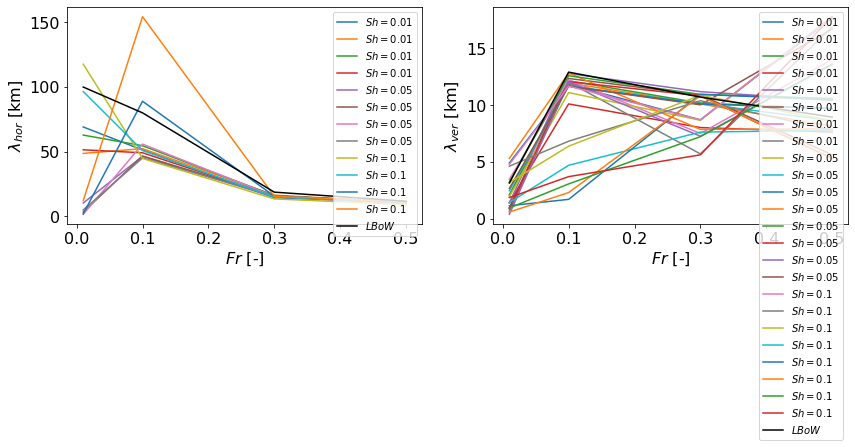

In [45]:
plt.figure(figsize=(14,4))
parameters = {'axes.labelsize': 16,'xtick.labelsize': 16, 'ytick.labelsize': 16}
plt.rcParams.update(parameters)
plt.subplot(1,2,1)
plt.plot(fr, lamb_eff_hor_vis[:4], label=r"$Sh = 0.01$")
plt.plot(fr, lamb_eff_hor_vis[4:8], label=r"$Sh = 0.05$")
plt.plot(fr, lamb_eff_hor_vis[8:12], label=r"$Sh = 0.1$")
plt.plot(fr, lambda_hor_lbow[:4], color='k', label=r"$LBoW$")
# plt.plot(fr, lambda_hor_lbow[4:8], color='k', label=r"$Sh = 0.05, LBoW$")
# plt.plot(fr, lambda_hor_lbow[8:12], color='k', label=r"$Sh = 0.1, LBoW$")
plt.xlabel(r"$Fr$ [-]")
plt.ylabel(r"$\lambda_{hor}$ [km]")
plt.legend()
plt.subplot(1,2,2)
plt.plot(fr, lamb_eff_ver_vis[:4], label=r"$Sh = 0.01$")
plt.plot(fr, lamb_eff_ver_vis[4:8], label=r"$Sh = 0.05$")
plt.plot(fr,lamb_eff_ver_vis[8:12], label=r"$Sh = 0.1$")
plt.plot(fr, lambda_ver_lbow[:4], color='k', label=r"$LBoW$")
plt.xlabel(r"$Fr$ [-]")
plt.ylabel(r"$\lambda_{ver}$ [km]")
plt.legend()

Text(0.5, 1.0, 'Sh = 0.01')

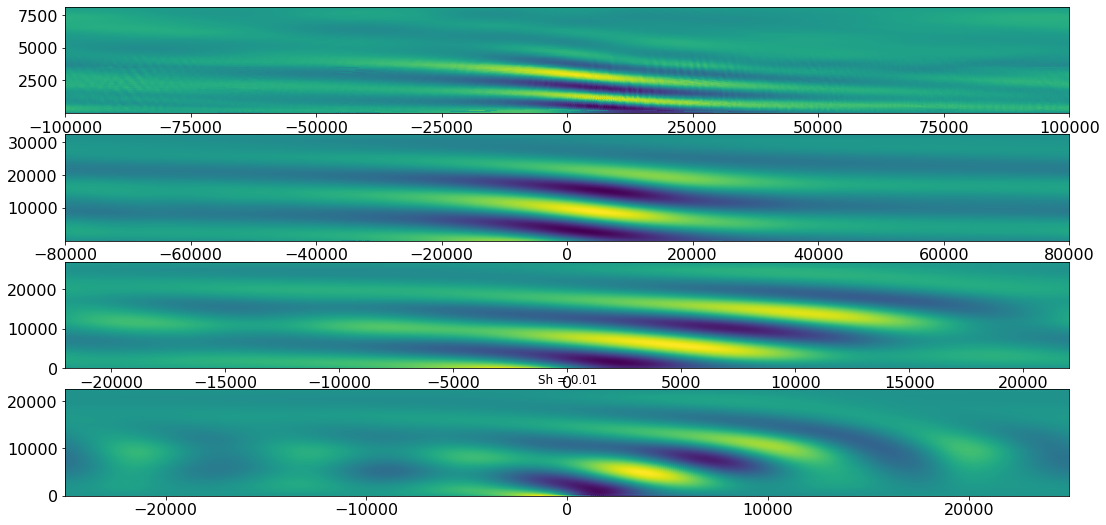

In [46]:
plt.figure(figsize=(18,9))
parameters = {'axes.labelsize': 16,'xtick.labelsize': 16, 'ytick.labelsize': 16}
plt.rcParams.update(parameters)
plt.subplot(4,1,1)
plt.pcolormesh(U0.x[:],U0.y[:],U0.w[:, :].T)
plt.subplot(4,1,2)
plt.pcolormesh(U1.x[:],U1.y[:],U1.w[:, :].T)
plt.subplot(4,1,3)
plt.pcolormesh(U2.x[:],U2.y[:],U2.w[:, :].T)
plt.subplot(4,1,4)
plt.pcolormesh(U3.x[:],U3.y[:],U3.w[:, :].T)
plt.title('Sh = 0.01')

Text(0.5, 1.0, 'Sh = 0.05')

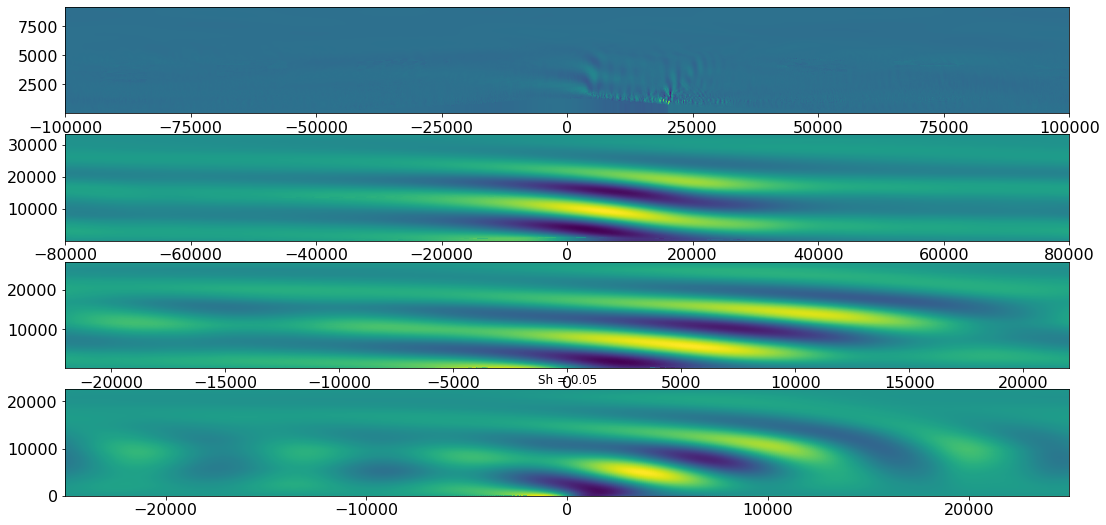

In [47]:
plt.figure(figsize=(18,9))
parameters = {'axes.labelsize': 16,'xtick.labelsize': 16, 'ytick.labelsize': 16}
plt.rcParams.update(parameters)
plt.subplot(4,1,1)
plt.pcolormesh(U4.x[:],U4.y[:],U4.w[:, :].T)
plt.subplot(4,1,2)
plt.pcolormesh(U5.x[:],U5.y[:],U5.w[:, :].T)
plt.subplot(4,1,3)
plt.pcolormesh(U6.x[:],U6.y[:],U6.w[:, :].T)
plt.subplot(4,1,4)
plt.pcolormesh(U7.x[:],U7.y[:],U7.w[:, :].T)
plt.title('Sh = 0.05')

Text(0.5, 1.0, 'Sh = 0.1')

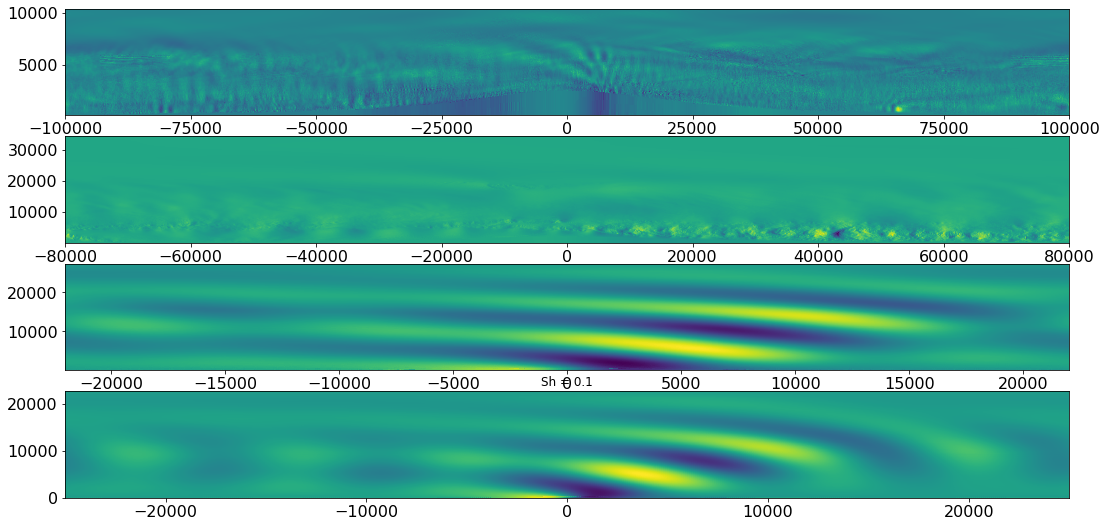

In [48]:
plt.figure(figsize=(18,9))
parameters = {'axes.labelsize': 16,'xtick.labelsize': 16, 'ytick.labelsize': 16}
plt.rcParams.update(parameters)
plt.subplot(4,1,1)
plt.pcolormesh(U8.x[:],U8.y[:],U8.w[:, :].T)
plt.subplot(4,1,2)
plt.pcolormesh(U9.x[:],U9.y[:],U9.w[:, :].T)
plt.subplot(4,1,3)
plt.pcolormesh(U10.x[:],U10.y[:],U10.w[:, :].T)
plt.subplot(4,1,4)
plt.pcolormesh(U11.x[:],U11.y[:],U11.w[:, :].T)
plt.title('Sh = 0.1')

In [49]:
x_coordinate=np.zeros(1000)
y_coordinate=np.zeros(1000)
x_coordinate_min=np.zeros(1000)
y_coordinate_min=np.zeros(1000)
c=np.zeros(1000)
for i in range(1000):
    c[i]=np.where(v2[600+i, :]==np.max(v2[600+i, :]))[0][0]
    x_coordinate[i]=v2[600+i, int(c[i])].coords['x'].values
    y_coordinate[i]=v2[600+i, int(c[i])].coords['y'].values
    #print(x_coordinate[i],y_coordinate[i])  

for i in range(1000):
    c[i]=np.where(v2[600+i, :]==np.min(v2[600+i, :]))[0][0]
    x_coordinate_min[i]=v2[600+i, int(c[i])].coords['x'].values
    y_coordinate_min[i]=v2[600+i, int(c[i])].coords['y'].values 

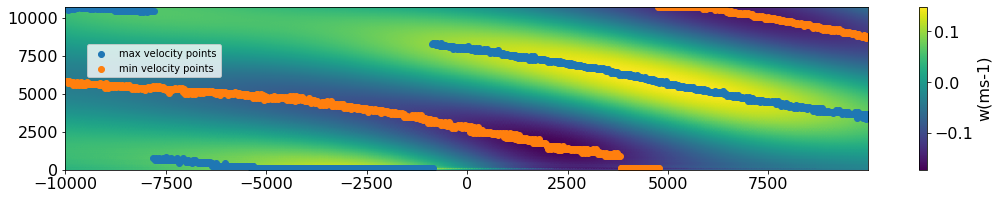

In [50]:
plt.figure(figsize=(18,3))
plt.pcolormesh(U2.x[600:1600],U2.y[:536],v2[600:1600, :].T)
plt.colorbar(label='w(ms-1)')
plt.scatter(x_coordinate,y_coordinate,  label="max velocity points")
plt.scatter(x_coordinate_min,y_coordinate_min, label="min velocity points")
#plt.plot(x_coordinate,y_coordinate, label="max velocity points")
#plt.plot(x_coordinate_min,y_coordinate_min, label="min velocity points")
#plt.xlim(-10000, 9500)
plt.legend(bbox_to_anchor=(0.2,0.8))

In [51]:
k_eff = 0.0009
m_eff = 0.0018

In [52]:
B = np.degrees(np.arccos(k_eff/(np.sqrt(k_eff**2+m_eff**2))))
print(B)

63.43494882292201


In [53]:
N = 0.01333
Cg_x = (m_eff**2 * N)/(k_eff**2 + m_eff**2)**(3/2)
Cg_z = (k_eff * m_eff * N)/(k_eff**2 + m_eff**2)**(3/2)

Cg = np.sqrt(Cg_x**2 + Cg_z**2)
print(Cg_x, Cg_z, Cg)

5.2989842026795015 2.6494921013397508 5.924444444444445


In [54]:
Cp_x = (N)/np.sqrt(k_eff**2 + m_eff**2)
Cp_z = (k_eff * N)/(m_eff * np.sqrt(k_eff**2 + m_eff**2))

Cp = np.sqrt(Cp_x**2 + Cp_z**2)
print(Cp_x, Cp_z, Cp)

6.623730253349377 3.3118651266746886 7.405555555555556


In [55]:
phi = 90 + B
print(phi)

153.43494882292202
